# mmdpieces
Classify two dimensional pieces.

# Description

The input image is a binary image typically found in industrial automation applications. It has three types of objects: rings, nails and T-pins. Our procedure for identification of these classes of objects is based on thickening, thinning and reconstruction.


In [1]:
import numpy as np
from PIL import Image
import ia870 as ia
import matplotlib.pyplot as plt
print(ia.__version__)

ia870 Python Morphology Toolbox version 0.8 25th Aug 2014 - in progress - migrating to Python 3


# Reading

The gray scale image to be processed is read. 

(-0.5, 228.5, 206.5, -0.5)

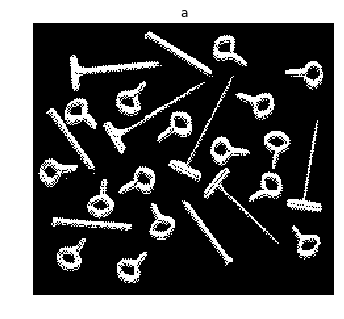

In [2]:
a_pil = Image.open('data/pieces_bw.tif').convert('L')
a = np.array (a_pil)
a = a.astype(np.bool)

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('a')
axes.imshow(a, cmap='gray')
axes.axis('off')

# Contour noise reduction

A thickening that preserves the number of connected objects is applied to reduce contour noise. 

.0.
000
...


(-0.5, 228.5, 206.5, -0.5)

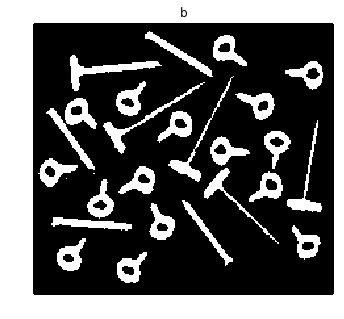

In [3]:
seA = ia.iaimg2se(ia.iabinary([[0,1,0],[1,0,1],[0,0,0]]))
seB = ia.iaimg2se(ia.iabinary([[0,0,0],[0,1,0],[0,0,0]]))
iAB = ia.iase2hmt(seA,seB)
print(ia.iaintershow(iAB))

b = ia.iathick(a, iAB);

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('b')
axes.imshow(b, cmap='gray')
axes.axis('off')

# Skeleton

The homotopic skeleton by thinning is created.  

(-0.5, 228.5, 206.5, -0.5)

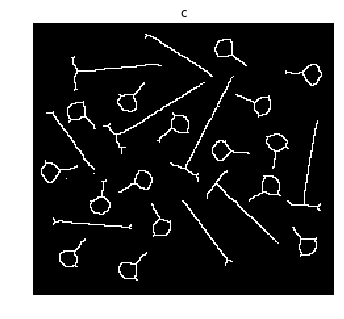

In [4]:
c = ia.iathin(b);

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('c')
axes.imshow(c, cmap='gray')
axes.axis('off')

# Skeleton pruning

The open lines of the skeleton are pruned by the end point thinning. The remaining skeleton components will be loops, identifying the rings. 

(-0.5, 228.5, 206.5, -0.5)

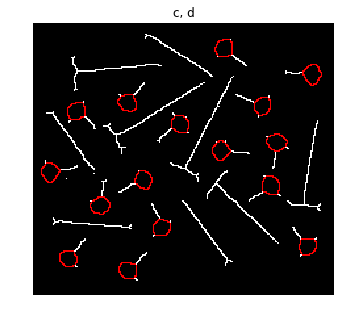

In [5]:
d = ia.iathin(c,ia.iaendpoints());

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('c, d')
axes.imshow(ia.iagshow(c, d).transpose(1, 2, 0))
axes.axis('off')

# Detect rings

Extraction of the rings by reconstruction of the thicked image from the filtered skeleton. 

(-0.5, 228.5, 206.5, -0.5)

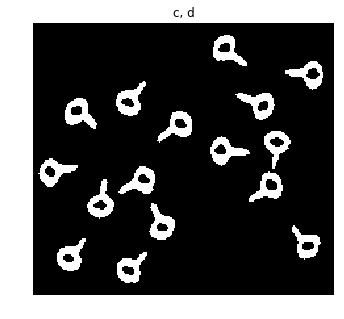

In [6]:
e = ia.iainfrec(d,b)
(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('c, d')
axes.imshow(e, cmap = 'gray')
axes.axis('off')

# Rings in the input image

Restriction of the objects detected to the input-image. 

(-0.5, 228.5, 206.5, -0.5)

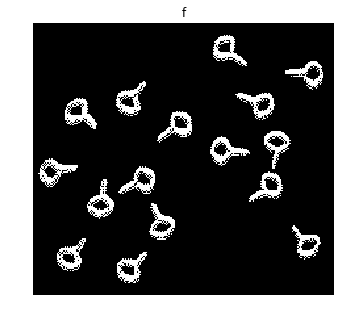

In [7]:
f = ia.iaintersec(a,e)

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('f')
axes.imshow(f, cmap = 'gray')
axes.axis('off')

# Skeleton of the remaining objects

It eliminates the skeleton of the rings. 

(-0.5, 228.5, 206.5, -0.5)

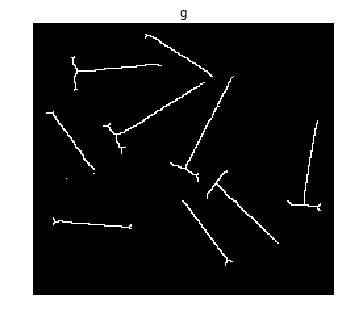

In [8]:
g = ia.iasubm(c,e)

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('g')
axes.imshow(g, cmap = 'gray')
axes.axis('off')

# End points filtering

It removes sucessively 4 end-points to let T junctions just on T-pins. 

(-0.5, 228.5, 206.5, -0.5)

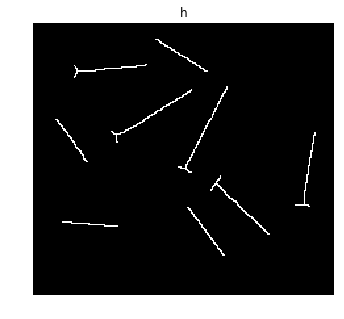

In [9]:
h = ia.iathin(g, ia.iaendpoints(), 4)

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('h')
axes.imshow(h, cmap = 'gray')
axes.axis('off')

# T-pins markers

It detects triple points, applying the union of matchings with the template rotated 90 degrees. These points will identify (mark) the T-pins. 

(-0.5, 228.5, 206.5, -0.5)

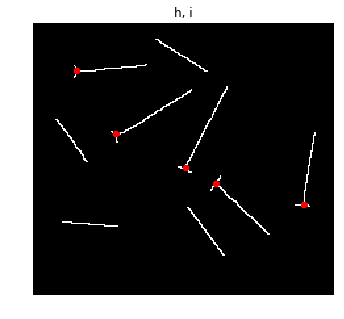

In [10]:
seA1 = ia.iaimg2se(ia.iabinary([[0,1,0],[0,1,0],[1,0,1]]))
seB1 = ia.iaimg2se(ia.iabinary([[0,0,0],[1,0,1],[0,1,0]]))
seA2 = ia.iaimg2se(ia.iabinary([[0,1,0],[1,1,1],[0,0,0]]))
seB2 = ia.iaimg2se(ia.iabinary([[1,0,1],[0,0,0],[0,1,0]]))
i1 = ia.iasupcanon(h, ia.iase2hmt(seA1,seB1))
i2 = ia.iasupcanon(h, ia.iase2hmt(seA2,seB2))
i = ia.iaunion(i1,i2)

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('h, i')
axes.imshow(ia.iagshow(h, ia.iadil(i, ia.iasedisk(2))).transpose(1, 2, 0))
axes.axis('off')

## Detect T-pins

Detection of the T-pins by reconstruction of the ticked image from the T-pin markers. 

(-0.5, 228.5, 206.5, -0.5)

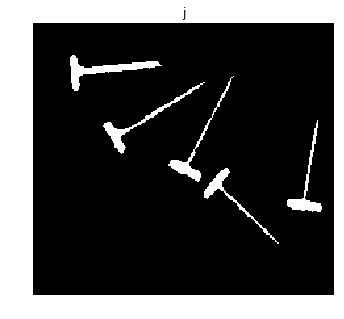

In [11]:
j = ia.iainfrec(i,b,ia.iasebox())

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('j')
axes.imshow(j, cmap = 'gray')
axes.axis('off')

## T-pins in the input image

Restriction of the objects detect to the input image

(-0.5, 228.5, 206.5, -0.5)

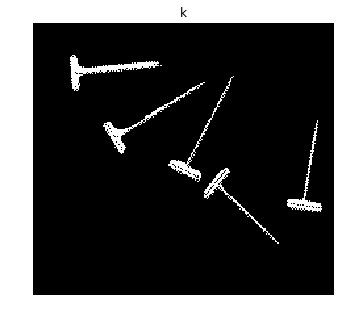

In [12]:
k = ia.iaintersec(a,j)

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('k')
axes.imshow(k, cmap = 'gray')
axes.axis('off')

## Detect nails

The nails are imediatly detected by the subtration of the images of the rings and T-pints from the input image. 

(-0.5, 228.5, 206.5, -0.5)

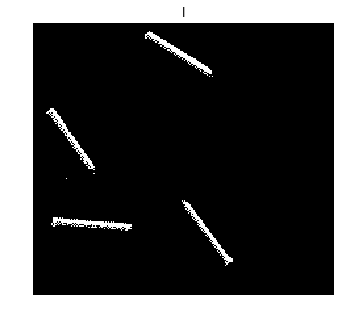

In [13]:
l = ia.iasubm(ia.iasubm(a,f),k)

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('l')
axes.imshow(l, cmap = 'gray')
axes.axis('off')

## Color composition

The result of the classification is presented in a pseudo color image. 

(-0.5, 228.5, 206.5, -0.5)

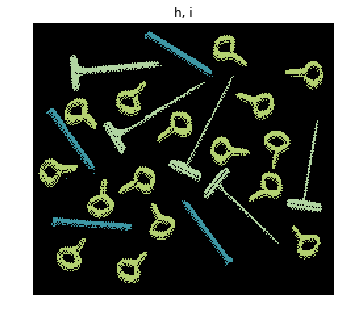

In [14]:
m = ia.iagray(f,'uint8',1);
n = ia.iagray(k,'uint8',2);
o = ia.iagray(l,'uint8',3);
p = ia.iaunion(m,n,o);

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('h, i')
axes.imshow(ia.iaglblshow(p).transpose(1, 2, 0))
axes.axis('off')